In [1]:
# set root directory
import os

os.chdir('../')
os.getcwd()

'c:\\Users\\HP\\Desktop\\clustering-moroccan-weather-data'

In [2]:
# imports
import numpy as np
import pandas as pd

In [3]:
# imports for plots
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio

pio.templates.default = "plotly_white"

In [4]:
# load data
# weather variables to use
selected_cols = ["cumulative_GDD", "cumulative_PRECTOT", "cumulative_RH2M", "cumulative_WS2M"]

dict_data = {}

for col in selected_cols:
  pathname = f"data_beni_mellal/{col}.csv"

  dict_data[col] = pd.read_csv(pathname, index_col=0)

In [5]:
# standarize
dict_standarized_data = {}

for col in selected_cols:
  # select data
  data = dict_data[col].copy()

  # scale data
  max_val = np.max(data.values)
  min_val = np.min(data.values)
  data = (data - min_val) / (max_val - min_val)

  # standarize each var
  for var in dict_data[col]:
    data[var] = (data[var] - data[var].mean())

  dict_standarized_data[col] = data

In [6]:
dict_standarized_data["cumulative_GDD"]

,0,1,2,3,4,5,6,7,8,9,...,259,260,261,262,263,264,265,266,267,268
1982,0.001393,0.002357,0.002926,0.003763,0.005298,0.006222,0.006585,0.006487,0.005937,0.005378,...,0.009660,0.009288,0.007372,0.005159,0.003892,0.003218,0.002930,0.002619,0.002406,0.002358
1983,0.000344,0.000873,0.001234,0.000516,-0.001487,-0.003841,-0.006206,-0.007180,-0.007974,-0.008578,...,-0.014137,-0.014356,-0.014963,-0.015852,-0.016888,-0.017866,-0.018743,-0.019585,-0.020561,-0.020926
1984,0.000577,0.001161,0.001294,0.001979,0.003083,0.004045,0.005056,0.005782,0.006215,0.006002,...,-0.013523,-0.013085,-0.012433,-0.011804,-0.011290,-0.010813,-0.010377,-0.009809,-0.009145,-0.008615
1985,0.000219,-0.000169,-0.000519,-0.000669,-0.000816,-0.001089,-0.001134,-0.000567,0.000113,0.000846,...,-0.037620,-0.038884,-0.039856,-0.039637,-0.039152,-0.038557,-0.037911,-0.037431,-0.036813,-0.035965
1986,0.000488,0.000563,0.000399,0.000500,0.000605,0.000725,0.001249,0.001759,0.002306,0.002628,...,-0.040626,-0.040527,-0.040245,-0.040028,-0.039791,-0.039390,-0.038734,-0.038067,-0.037468,-0.037713
1987,-0.000502,-0.000986,-0.001707,-0.002819,-0.003348,-0.003283,-0.003181,-0.002962,-0.002742,-0.002944,...,0.026792,0.026547,0.026733,0.026246,0.024904,0.023796,0.023265,0.023100,0.022316,0.020831
1988,0.000179,0.000088,0.000263,0.000344,0.000712,0.000686,0.000539,0.000764,0.001099,0.001229,...,-0.050885,-0.051314,-0.052020,-0.053323,-0.054757,-0.055475,-0.055613,-0.055780,-0.055817,-0.055038
1989,-0.001285,-0.002786,-0.004474,-0.005605,-0.006261,-0.006174,-0.005720,-0.005107,-0.004584,-0.003726,...,-0.056486,-0.056339,-0.056200,-0.056917,-0.057721,-0.058415,-0.058973,-0.059738,-0.060445,-0.060432
1990,-0.000726,-0.001118,-0.001334,-0.000927,-0.000078,0.000948,0.002193,0.003070,0.003195,0.003573,...,0.033786,0.033883,0.034442,0.035293,0.036254,0.036633,0.036687,0.036984,0.037426,0.037883
1991,-0.000327,-0.000253,-0.000448,-0.000542,-0.000677,-0.000651,-0.000777,-0.001962,-0.002619,-0.003074,...,-0.083591,-0.083672,-0.083773,-0.083886,-0.084697,-0.085970,-0.087100,-0.087438,-0.087133,-0.086580


In [7]:
# from PCA time dimension univariate
# cumulative GDD: n_components = 6
# cumulative PREC: n_components = 7

from sklearn.decomposition import PCA


arr_nb_PC = [6, 7, 8, 8]

# where to store pca
dict_pca = {}
# where to store transformed data
dict_transformed_data = {}

# loop over weather vars
for col, n in zip(selected_cols, arr_nb_PC):
  # build pca
  pca = PCA(n_components=n)
  pca.fit(dict_standarized_data[col])

  dict_pca[col] = pca

  # transform data
  dict_transformed_data[col] = pd.DataFrame(pca.transform(dict_standarized_data[col]), index=dict_standarized_data[col].index)

In [8]:
dict_transformed_data["cumulative_WS2M"]

,0,1,2,3,4,5,6,7
1982,-0.535482,0.078637,0.232364,-0.065784,0.061517,-0.016286,-0.029938,-0.014372
1983,-0.575973,0.085255,-0.015790,0.014152,-0.002526,-0.005640,-0.002340,-0.024458
1984,-0.301120,-0.129640,-0.101173,0.090992,0.019264,0.003308,0.024918,-0.042157
1985,0.505985,0.009520,-0.084284,0.017550,-0.026593,-0.034013,-0.017398,-0.015061
1986,0.063235,-0.109505,0.093789,-0.064604,0.037879,-0.014997,0.017166,0.014283
1987,-0.461456,-0.101978,0.152558,0.040294,-0.090648,-0.023970,0.032413,0.021452
1988,-0.082904,0.156596,-0.012709,0.030253,-0.066634,0.041531,0.006767,-0.001175
1989,0.016546,-0.030803,-0.045401,-0.072243,-0.015636,-0.036762,-0.002774,-0.001306
1990,0.550822,0.295382,-0.068121,0.014976,0.038492,0.017138,-0.010752,0.022147
1991,-0.103360,-0.077357,0.022598,-0.081597,0.020500,0.047358,0.025141,-0.009170


In [9]:
# join two data sets
merged_data = dict_transformed_data["cumulative_GDD"].join(dict_transformed_data["cumulative_PRECTOT"], rsuffix='_other')

# for col in selected_cols[2:]:
#     merged_data = merged_data.join(dict_transformed_data[col], rsuffix='_other_')

In [11]:
# params
metric = "euclidean"
linkage_method = "ward"

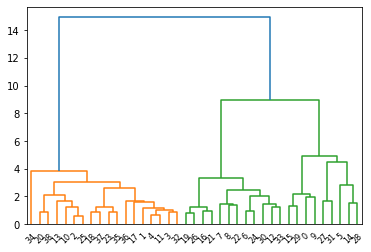

In [12]:
# clustering
# dendrogram to have an idea about aggregation procedure
# and the evolution between cluster distance

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(merged_data, metric=metric, method=linkage_method)
# fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

In [13]:
# use Calanski-Harabasz index
# to choose the right number of cluster

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


# where to store CH index
arr_calanski = {}

# max possible number of cluster
max_k = 10

# data
X = merged_data

# loop over number of clusters
for k in range(2, max_k):
  # build model 
  model = AgglomerativeClustering(n_clusters=k, linkage=linkage_method, affinity=metric)
  model = model.fit(X)

  # clusters label
  labels = model.fit_predict(X)

  # compute calanski metric
  m = metrics.calinski_harabasz_score(X, labels)

  arr_calanski[k] = m


# plot of CH index
fig = go.Figure(data=[
                      go.Scatter(x=list(arr_calanski.keys()), y=list(arr_calanski.values()))
])

fig.update_layout(
    width=800,
    height=500,
    xaxis_title="number of cluster",
    yaxis_title="Calanski-Harbasz index"
)

fig.show()

In [14]:
from sklearn.cluster import AgglomerativeClustering

X = merged_data
model = AgglomerativeClustering(n_clusters=3, linkage=linkage_method, affinity=metric)
model = model.fit(X)

labels = model.fit_predict(X)

labels

array([0, 1, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 1, 1], dtype=int64)

In [15]:
dict_crop_years = { f"cluster_{i}": [] for i in range(3) }

for year, label in zip(range(1982, 1982 + 39), labels):
  dict_crop_years[f"cluster_{label}"].append(year)

In [16]:
dict_crop_years

{'cluster_0': [1982, 1987, 1991, 1996, 1997, 2009, 2010, 2011, 2013],
 'cluster_1': [1983,
  1984,
  1985,
  1986,
  1992,
  1993,
  1995,
  1999,
  2000,
  2002,
  2005,
  2007,
  2014,
  2016,
  2017,
  2018,
  2019,
  2020],
 'cluster_2': [1988,
  1989,
  1990,
  1994,
  1998,
  2001,
  2003,
  2004,
  2006,
  2008,
  2012,
  2015],
 'cluster_3': []}